<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting/blob/main/Sector_Indices_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import datetime
import pytz
tz_NY = pytz.timezone('Asia/Kolkata')
datetime_NY = datetime.datetime.now(tz_NY)
print("Run date time (IST):", datetime_NY.strftime("%Y-%m-%d %H:%M:%S"))

gen_output = 0

Run date time (IST): 2024-05-26 13:09:31


In [2]:
# install libraries
!pip install yfinance
!pip install pandas-ta
#!pip install talib-binary

In [3]:
# import libraries

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')
import pandas_datareader.data as web
import yfinance as yfin
#import talib
yfin.pdr_override()
import pandas_ta as ta

from google.colab import data_table

yfinance: pandas_datareader support is deprecated & semi-broken so will be removed in a future verison. Just use yfinance.


In [4]:
# set start and end date
start_date = (datetime.date.today() + datetime.timedelta(days=-365)).strftime('%Y-%m-%d')
end_date = (datetime.date.today() + datetime.timedelta(days=1)).strftime('%Y-%m-%d')

In [5]:
# fetch nse indices scrips

import pandas as pd
import numpy as np

df_nse_sectors = pd.read_csv('https://raw.githubusercontent.com/ankit-rathi/Tradevesting/main/data/NSE_Sectors_Indices.csv')

In [6]:
sectors = df_nse_sectors['Sector'].unique()
df_sectors = pd.DataFrame()
for sector in sectors:
  stocks = df_nse_sectors[df_nse_sectors['Sector'] == sector]['Symbol'].values
  df_sector = pd.DataFrame()
  tweight = 0
  for stock in stocks:
    stock_df = yfin.Ticker(stock+'.NS').history(period='max', interval='1d')[map(str.title, ['open', 'close', 'low', 'high', 'volume'])]
    col = ['Close']
    stock_df = stock_df[col]
    stock_df['Split'] = 1
    weight = df_nse_sectors[df_nse_sectors['Symbol'] == stock]['Weight'].values[0]
    tweight = sum(df_nse_sectors[df_nse_sectors['Sector'] == sector]['Weight'].values)
    if stock == 'NESTLEIND':
      stock_df.loc[stock_df.index < '2024-01-01', 'Split'] = 10
    #stock_df[stock] = (stock_df[col]*weight)/(tweight*stock_df['Split'].values[0])
    stock_df[stock] = stock_df['Close']/stock_df['Split']
    col = [stock]
    stock_df = stock_df[col]
    df_sector = pd.concat([df_sector, stock_df], axis=1)

  df_sector[sector] = df_sector[stocks].sum(axis=1)
  col = [sector]
  df_sector = df_sector[col]
  df_sectors = pd.concat([df_sectors, df_sector], axis=1)
df_sectors

,AUTO,BANKS,FINANCE,IT,FMCG,PHARMA,MEDIA,METAL,INFRA,CHEMICAL,CEMENT,DURABLES,JEWELLERY,TEXTILES
Date,,,,,,,,,,,,,,
1991-01-02 00:00:00+05:30,15.738644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-03 00:00:00+05:30,15.738644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-04 00:00:00+05:30,15.738644,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-07 00:00:00+05:30,15.199646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1991-01-08 00:00:00+05:30,15.199646,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17 00:00:00+05:30,32156.150452,6236.861084,9850.399933,13142.299927,12892.057556,18156.249878,2879.999947,6238.599304,26402.099228,23063.150070,41153.300354,22628.850677,4461.849915,6040.749989
2024-05-21 00:00:00+05:30,31977.699890,6232.600098,9878.650162,13111.800018,12982.266418,18363.399780,2907.250042,6458.107819,26367.000397,23420.149734,40630.199768,23025.600311,4458.200012,6033.849892
2024-05-22 00:00:00+05:30,31943.699707,6214.599976,9862.599762,13197.300110,13170.033051,18555.200195,2912.649914,6467.967117,26463.499649,22954.649567,40597.048889,23149.500122,4471.100098,5998.650002


In [15]:
def stock_prec_dev(stock_symbol):
    #print(stock_symbol)
    #stock_symbol = 'ULTRACEMCO.NS'
    short_window = 20
    mid_window = 50
    long_window = 200
    moving_avg = 'SMA'

    # import the closing price data of the stock for the aforementioned period of time in Pandas dataframe
    start = datetime.datetime(*map(int, start_date.split('-')))
    end = datetime.datetime(*map(int, end_date.split('-')))

    stock_df = df_sectors[[stock_symbol]]
    stock_df.columns = ['Close']

    stock_df['Max'] = round(max(stock_df['Close']),2)

    stock_df = stock_df[(stock_df.index <= end_date) & (stock_df.index >= start_date)]
    stock_df['200_SMA'] = round(stock_df['Close'].rolling(window = 200, min_periods = 1).mean(),0)
    stock_df['Dev%_200'] = round((stock_df['Close'] - stock_df['200_SMA'])*100/stock_df['200_SMA'],2)
    stock_df.dropna(axis = 0, inplace = True) # remove any null rows

    stock_df['Sector'] = stock_symbol

    stock_df['Close'] = round(stock_df['Close'],2)
    #print(stock_df)
    stock_df['Min'] = round(min(stock_df['Close']),2)
    #stock_df['Gained%'] = round((stock_df['Close'] - stock_df['Min'])*100/stock_df['Min'],2)
    stock_df.ta.rsi(append=True)
    #stock_df.rename(columns={'RSI_14':'RSI'}, inplace=True)
    #stock_df['Close'] = round(stock_df['Close'],0)
    stock_df['RSI_14'] = round(stock_df['RSI_14'],0)
    stock_df['ATH%'] = round((stock_df['Max'] - stock_df['Close'])*100/stock_df['Close'],2)
    #stock_df['Sector'] = stock_symbol
    stock_df = stock_df.tail(1)
    return stock_df

In [16]:
df_final =  pd.DataFrame()
for sector in sectors:

  df_tmp = stock_prec_dev(sector)
  df_final = pd.concat([df_final, df_tmp], ignore_index = True) #df_final.append(df_tmp)
# all sectors
df_final = df_final.sort_values(by = 'ATH%', ascending=False)
#data_table.DataTable(df_final, include_index=False)
df_final

,Close,Max,200_SMA,Dev%_200,Sector,Min,RSI_14,ATH%
6,214.97,282.15,243.0,-11.53,MEDIA,100.00,50.0,31.25
3,110.64,126.03,113.0,-2.09,IT,96.92,53.0,13.91
12,119.35,135.61,121.0,-1.36,JEWELLERY,99.75,46.0,13.62
10,109.30,120.39,107.0,2.15,CEMENT,39.23,55.0,10.15
2,116.08,122.88,114.0,1.83,FINANCE,100.00,56.0,5.86
9,137.17,141.59,116.0,18.25,CHEMICAL,95.73,57.0,3.22
4,138.40,142.55,118.0,17.29,FMCG,84.32,58.0,3.00
5,142.00,144.73,129.0,10.08,PHARMA,99.87,54.0,1.92
13,118.28,120.31,112.0,5.61,TEXTILES,99.83,56.0,1.72
8,140.51,141.56,125.0,12.41,INFRA,99.82,65.0,0.75


In [ ]:
col = ['JEWELLERY']
sector_df = df_sectors[col]
sector_df.columns = ['Close']
sector_df['200_SMA'] = round(sector_df['Close'].rolling(window = 200, min_periods = 1).mean(),0)
sector_df['50_SMA'] = round(sector_df['Close'].rolling(window = 50, min_periods = 1).mean(),0)
sector_df['20_SMA'] = round(sector_df['Close'].rolling(window = 20, min_periods = 1).mean(),0)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
tmp_df = sector_df.reset_index()
tmp_df.plot(x='Date', y=['Close','200_SMA','50_SMA','20_SMA'], figsize=(18,9))

In [9]:
df_sectors = df_sectors[(df_sectors.index <= end_date) & (df_sectors.index >= start_date)]
for sector in sectors:
  base_value = df_sectors[sector].head(1).values[0]
  df_sectors[sector] = df_sectors[sector]*100/base_value

df_sectors

,AUTO,BANKS,FINANCE,IT,FMCG,PHARMA,MEDIA,METAL,INFRA,CHEMICAL,CEMENT,DURABLES,JEWELLERY,TEXTILES
Date,,,,,,,,,,,,,,
2023-05-29 00:00:00+05:30,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2023-05-30 00:00:00+05:30,100.022617,100.499648,101.142141,100.036349,99.800640,99.866974,205.490621,98.927766,100.001567,100.026674,101.149061,100.221349,99.752742,100.426125
2023-05-31 00:00:00+05:30,99.816861,100.317784,100.813558,100.054521,101.088425,100.686224,206.284540,98.222185,99.819103,100.254063,99.865414,102.260246,100.279087,99.825616
2023-06-01 00:00:00+05:30,100.088309,98.716106,101.382783,100.150721,101.053374,101.480655,206.437247,97.988878,100.507965,100.186838,100.034508,103.074850,100.378400,100.408704
2023-06-02 00:00:00+05:30,101.759292,99.114923,101.375322,100.142407,101.562365,102.007225,205.667100,97.972063,101.516597,100.123012,99.787320,103.451849,102.121716,100.934003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-17 00:00:00+05:30,164.145423,103.803166,113.964288,109.453304,136.093824,139.938902,213.707139,137.169078,136.742902,139.436275,110.447491,193.628149,118.642208,119.263750
2024-05-21 00:00:00+05:30,163.234498,103.732248,114.291129,109.199291,137.046106,141.535506,215.729201,141.995447,136.561117,141.594640,109.043591,197.023014,118.545155,119.127520
2024-05-22 00:00:00+05:30,163.060939,103.432663,114.105434,109.911363,139.028247,143.013803,216.129892,142.212225,137.060910,138.780297,108.954620,198.083187,118.888173,118.432562


<Axes: xlabel='Date'>

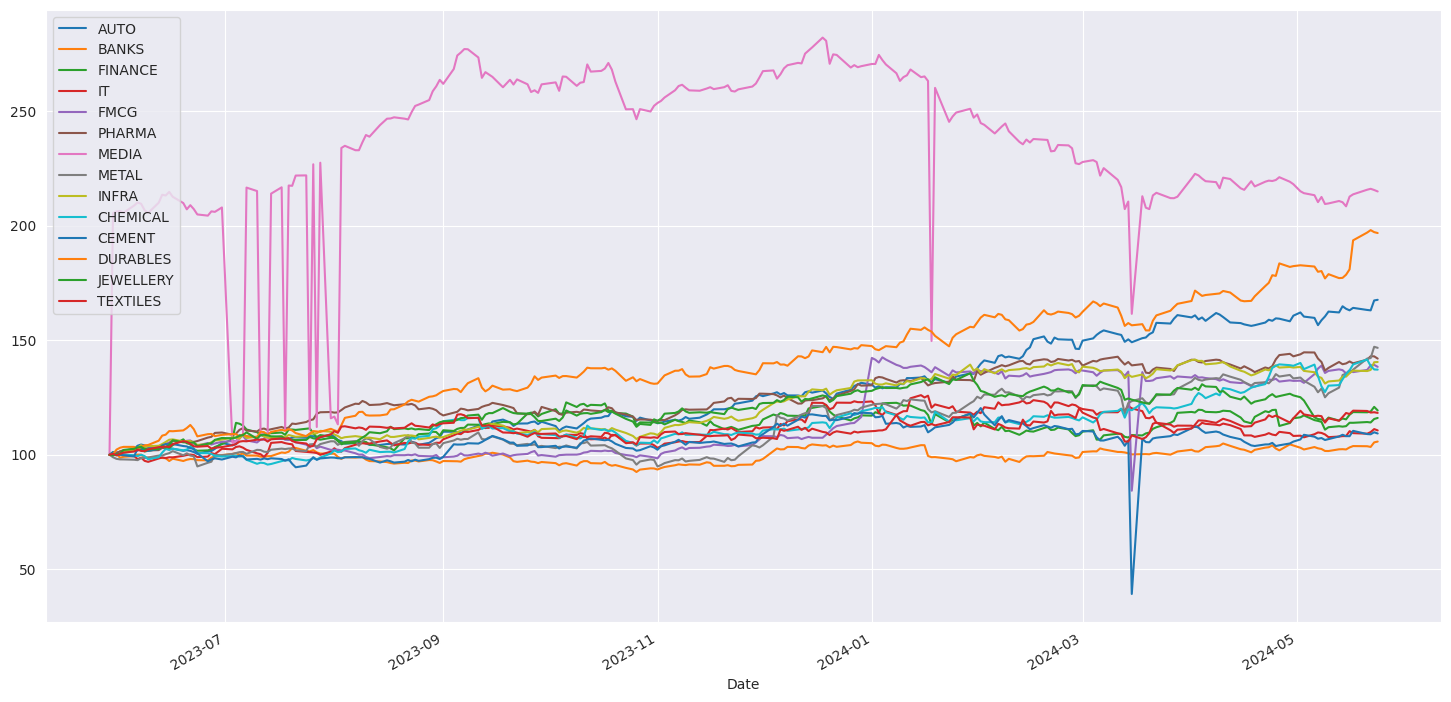

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
tmp_df = df_sectors.reset_index()
tmp_df.plot(x='Date', y=['AUTO', 'BANKS', 'FINANCE', 'IT', 'FMCG', 'PHARMA', 'MEDIA', 'METAL', 'INFRA', 'CHEMICAL', 'CEMENT', 'DURABLES', 'JEWELLERY', 'TEXTILES'], figsize=(18,9))

In [ ]:
tmp_df